Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define input values (X) and their corresponding expected outputs (Y)

In [2]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

Sigmoid activation function

Formula: f(w, b, x) = 1 / (1 + exp(-(w*x + b)))

In [3]:
def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

Error function (Mean Squared Error)

Formula: E = 1/2 * Σ (f(w,b,x) - y)^2

In [4]:
def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

Gradient of error w.r.t weight (w)

Formula: ∂E/∂w = (f(w, b, x) - y) * f(w, b, x) * (1 - f(w, b, x)) * x

In [5]:
def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

Gradient of error w.r.t bias (b)

Formula: ∂E/∂b = (f(w, b, x) - y) * f(w, b, x) * (1 - f(w, b, x))

In [6]:
def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

Line Search Gradient Descent Algorithm

This method dynamically selects the best learning rate at each iteration

In [7]:
def do_line_search_gradient_descent():
    w, b = -2, -2  # Initialize weight and bias
    etas = [0.1, 0.5, 1.0, 5.0, 10.0]  # Different learning rates to test
    max_epochs = 1000  # Number of training iterations
    w_path, b_path = [], []  # To store the trajectory of w and b

    for i in range(max_epochs):
        dw, db = 0, 0  # Initialize gradients
        for x, y in zip(X, Y):  # Compute gradients for each data point
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        min_error = float('inf')  # Set a high initial error value
        best_w, best_b = w, b  # Initialize best parameters

        # Line Search: Try multiple learning rates and select the best one
        for eta in etas:
            tmp_w = w - eta * dw  # Update rule: w_new = w - η * ∂E/∂w
            tmp_b = b - eta * db  # Update rule: b_new = b - η * ∂E/∂b
            if error(tmp_w, tmp_b) < min_error:  # Check if error decreases
                best_w, best_b = tmp_w, tmp_b
                min_error = error(tmp_w, tmp_b)

        # Update w and b to the best values found
        w, b = best_w, best_b

        # Store values for visualization
        w_path.append(w)
        b_path.append(b)

    return w_path, b_path

Create a mesh grid for 3D visualization

In [8]:
W = np.linspace(-3, 3, 50)  # Range for weight values
B = np.linspace(-3, 3, 50)  # Range for bias values
W, B = np.meshgrid(W, B)  # Create grid

Compute the error function on the entire grid

In [9]:
Z = np.array([[error(w, b) for w, b in zip(W_row, B_row)] for W_row, B_row in zip(W, B)])

Get the optimization trajectory

In [10]:
ls_w_path, ls_b_path = do_line_search_gradient_descent()

3D Visualization of the error surface and gradient descent path

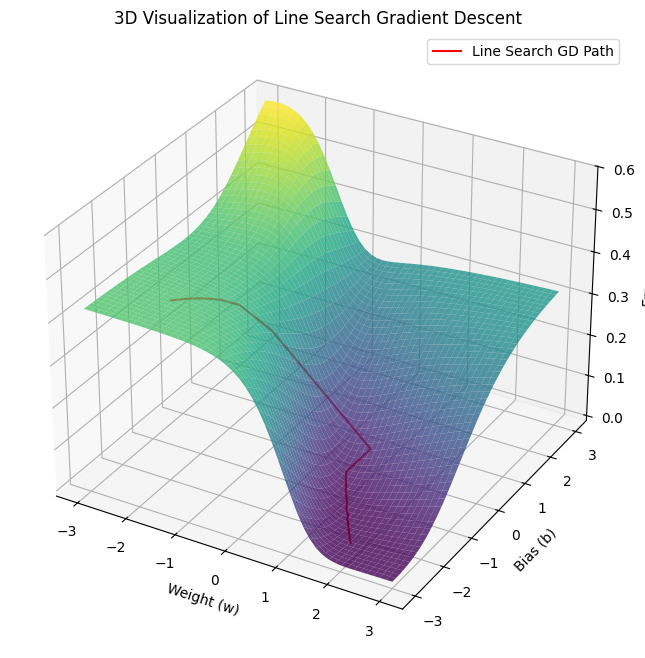

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# Plot the path taken by Line Search Gradient Descent
ax.plot(ls_w_path, ls_b_path, [error(w, b) for w, b in zip(ls_w_path, ls_b_path)],
        color='red', label="Line Search GD Path")

# Label axes
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('3D Visualization of Line Search Gradient Descent')

plt.legend()
plt.show()